* age: Age of the patient

* anaemia: Haemoglobin level of patient (Boolean)
* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
* diabetes: If the patient has diabetes (Boolean)
* ejection_fraction: Percentage of blood leaving the heart at each contraction
* high_blood_pressure: If the patient has hypertension (Boolean)
* platelets: Platelet count of blood (kiloplatelets/mL)
* serum_creatinine: Level of serum creatinine in the blood (mg/dL)
* serum_sodium: Level of serum sodium in the blood (mEq/L)
* sex: Sex of the patient
* smoking: If the patient smokes or not (Boolean)
* time: Follow-up period (days)
* DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

* **Sex - Gender of patient Male = 1, Female =0**

* **Diabetes - 0 = No, 1 = Yes**
* **Anaemia - 0 = No, 1 = Yes**
* **High_blood_pressure - 0 = No, 1 = Yes**
* **Smoking - 0 = No, 1 = Yes**
* **DEATH_EVENT - 0 = No, 1 = Yes**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
%matplotlib inline

# Read Data

In [2]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/heart_failure.csv'
df=pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data Correlation

In [7]:
corr=df.corr()
corr.style.background_gradient(cmap="hsv")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


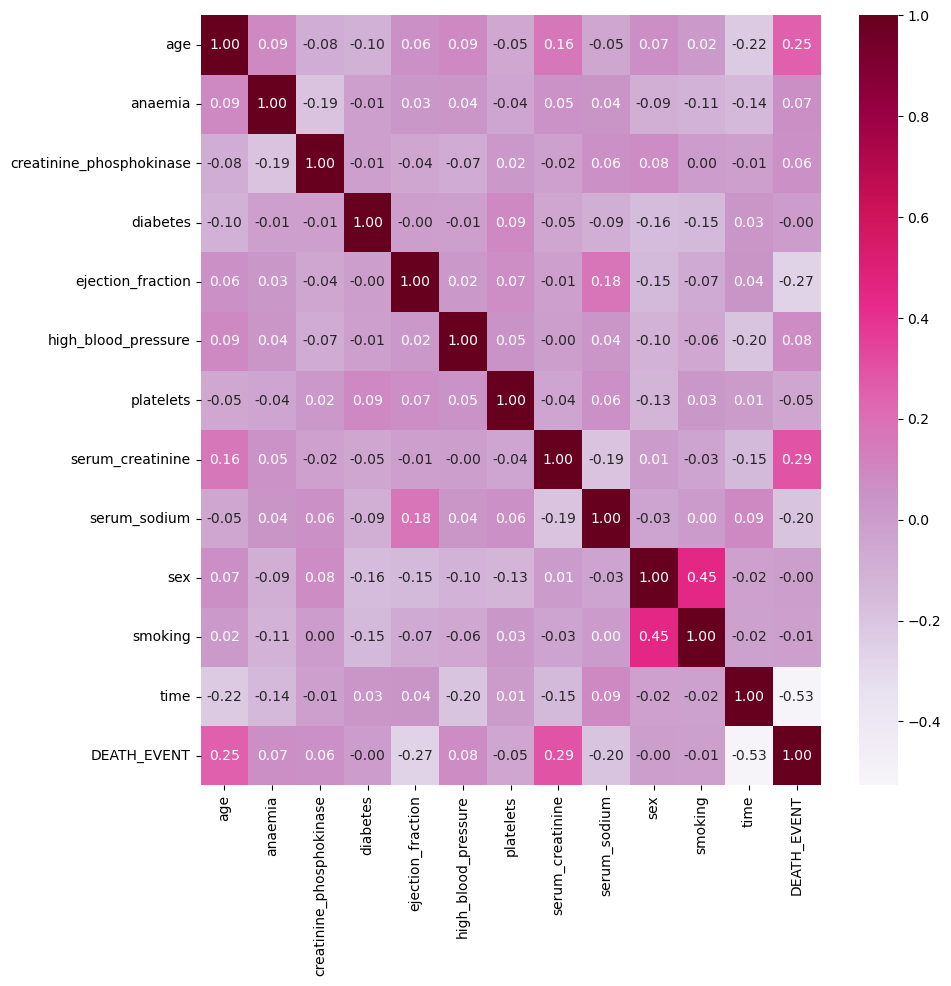

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="PuRd",fmt=".2f")
plt.show()

In [9]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Compare Death Event

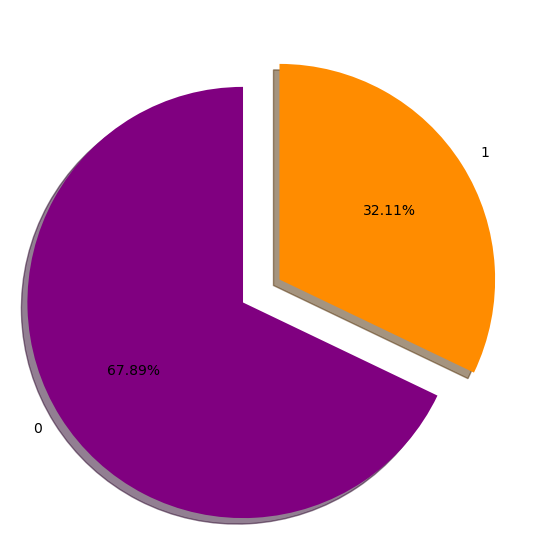

In [10]:
count=df.DEATH_EVENT.value_counts()
my_label=count.index
my_value=count.values
myexplode = [0.2, 0]
my_color=["purple","darkorange"]
plt.figure(figsize=(10,7))
plt.pie(my_value, labels = my_label, startangle = 90,autopct='%1.2f%%',
                          explode=myexplode,shadow=True,colors=my_color)
plt.show()

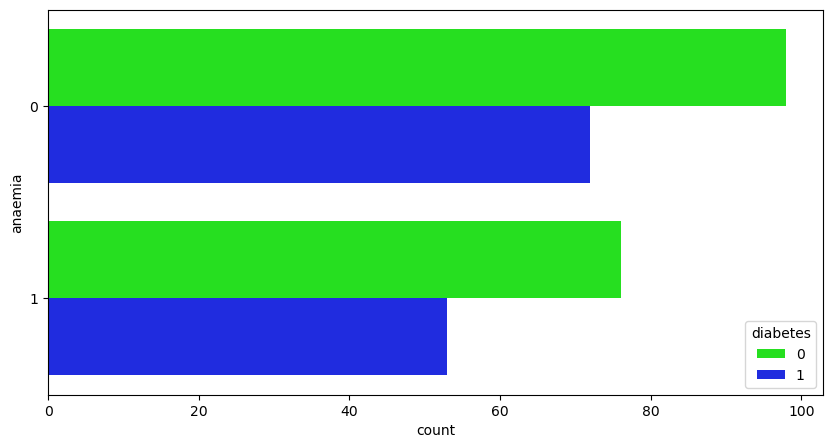

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="anaemia", hue="diabetes",palette="hsv")
plt.show()

# Count Blood Pressure

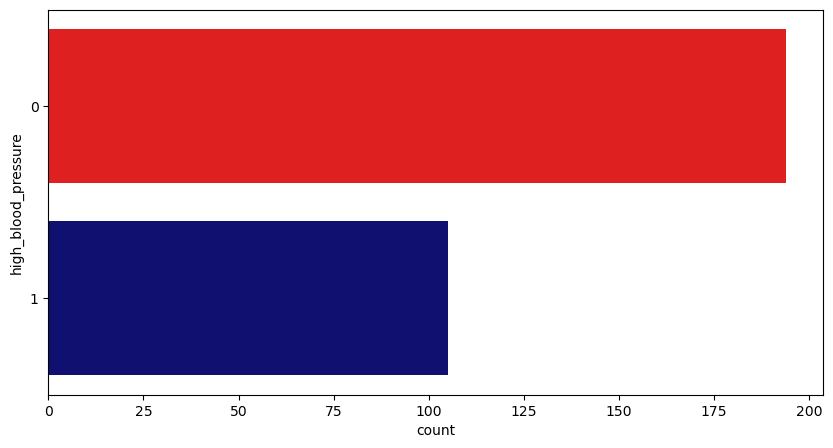

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="high_blood_pressure",palette=["red","navy"])
plt.show()

# Count Sex(Male Vs Female)

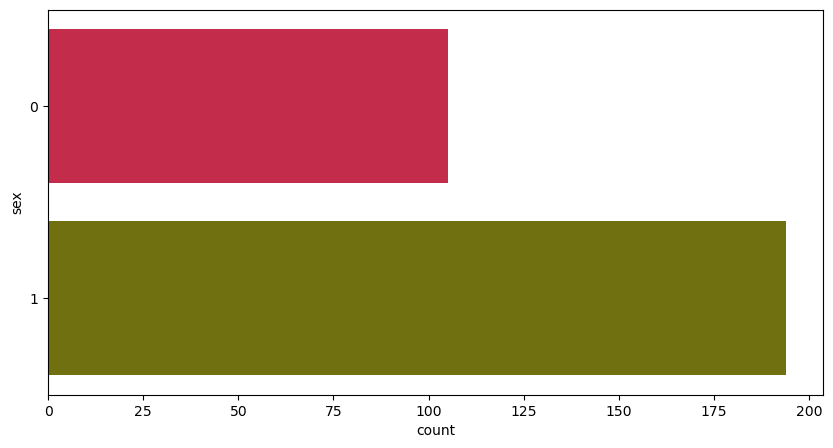

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="sex",palette=["crimson","olive"])
plt.show()

# Count Smoking

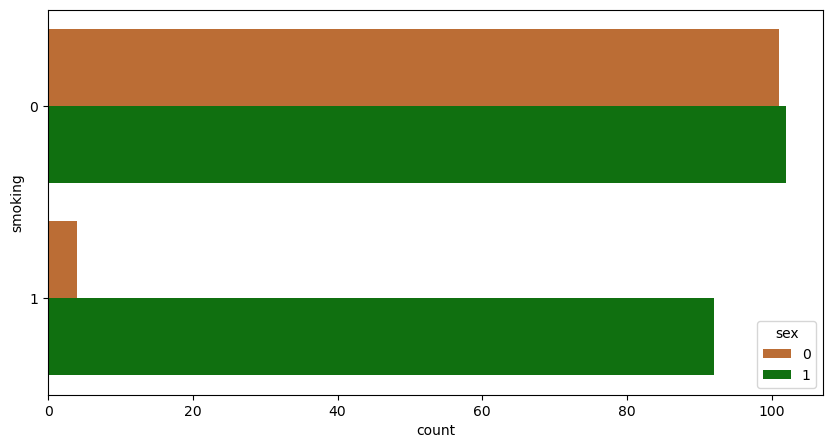

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="smoking",hue="sex",palette=["chocolate","green"])
plt.show()

# Age Histogram

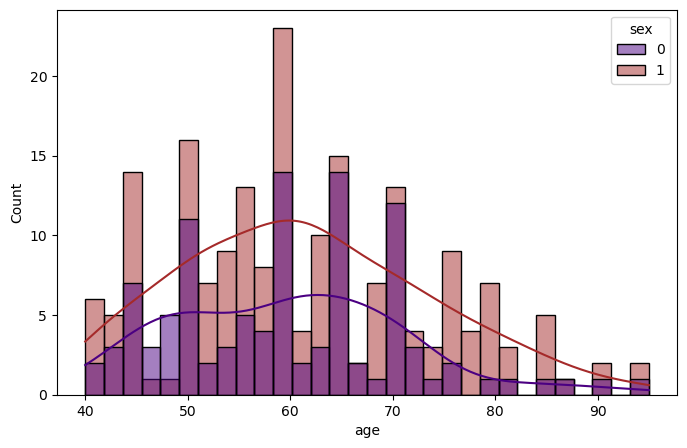

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age",bins=30,kde=True,hue="sex",palette=["indigo", "brown"])
plt.show()

# Creatinine_phosphokinase Histogram

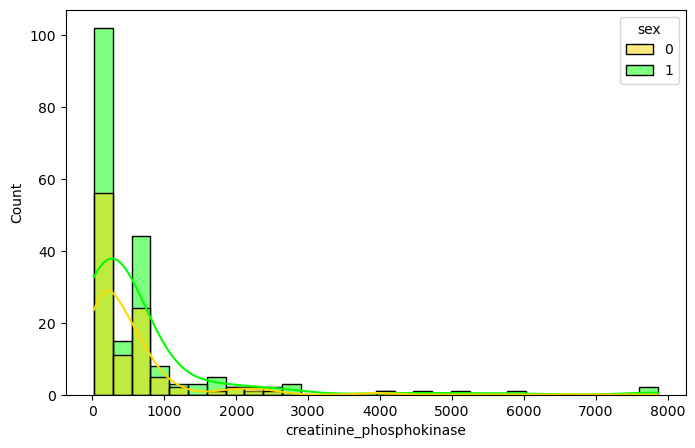

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="creatinine_phosphokinase",bins=30,kde=True,hue="sex",palette=["gold", "lime"])
plt.show()

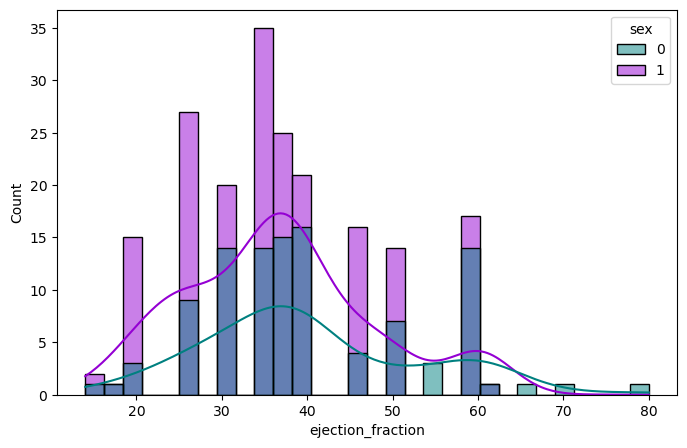

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="ejection_fraction",bins=30,kde=True,hue="sex",palette=["teal","darkviolet"])
plt.show()

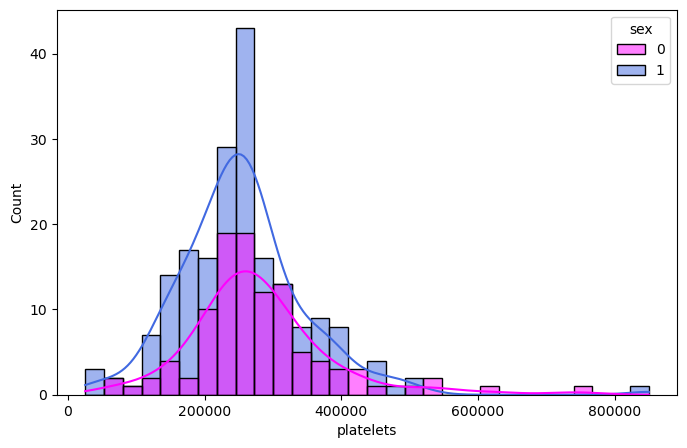

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="platelets",bins=30,kde=True,hue="sex",palette=["magenta","royalblue"])
plt.show()

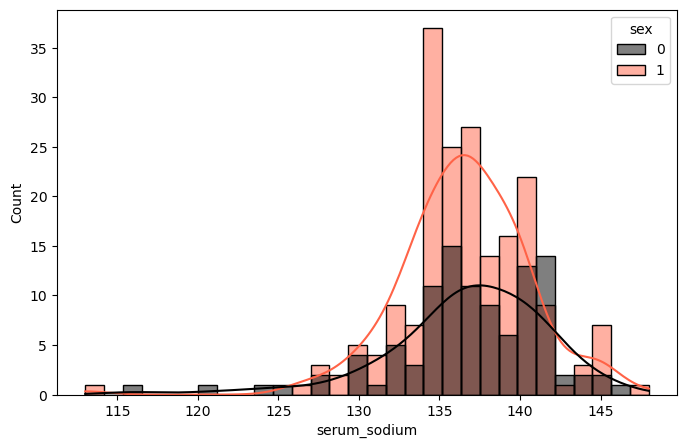

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="serum_sodium",bins=30,kde=True,hue="sex",palette=["black","tomato"])
plt.show()

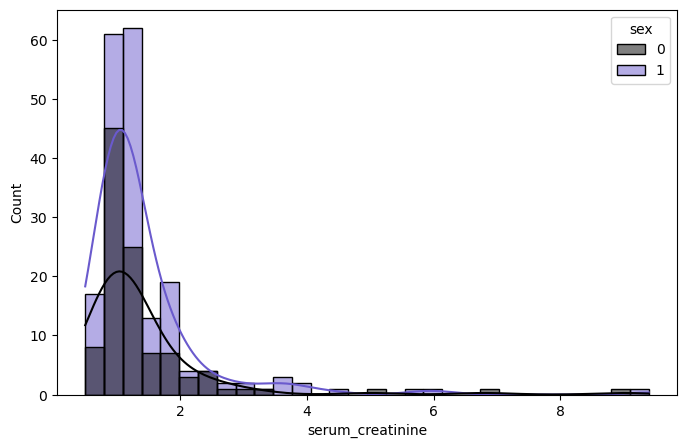

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="serum_creatinine",bins=30,kde=True,hue="sex",palette=["black","slateblue"])
plt.show()

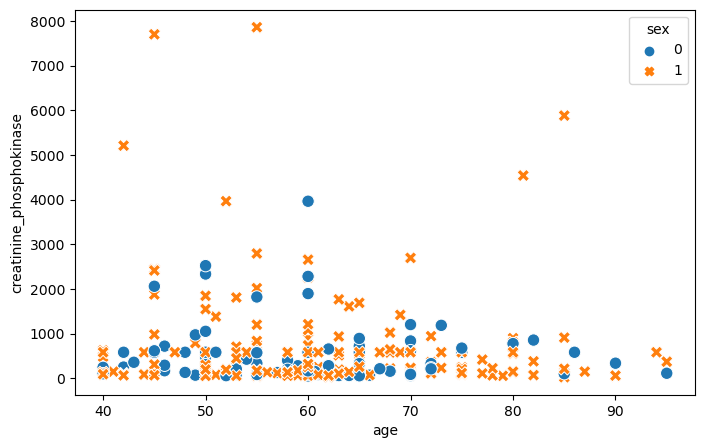

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="age", y="creatinine_phosphokinase", hue="sex",style="sex",s=80)
plt.show()


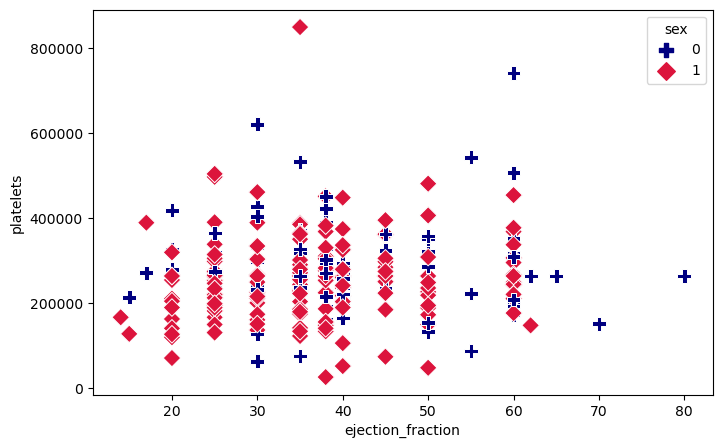

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="ejection_fraction", y="platelets", hue='sex', style='sex', 
                markers=["P", "D"],sizes=(80,100),size="sex",palette=["navy","crimson"])
plt.show()


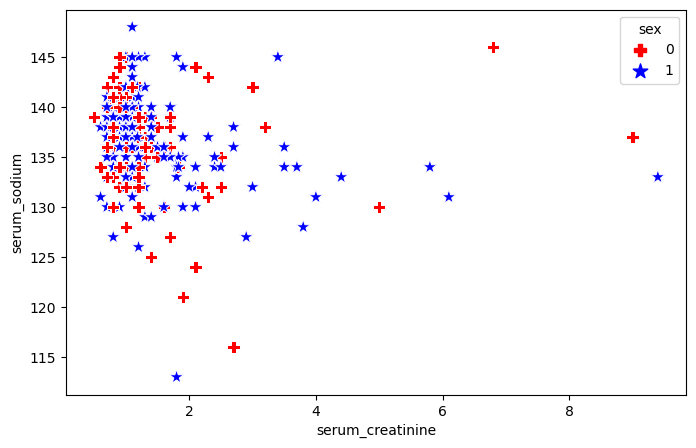

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="serum_creatinine", y="serum_sodium", hue='sex', style='sex', 
                markers=["P", "*"],sizes=(120,80),size="sex",palette=["red","blue"])
plt.show()

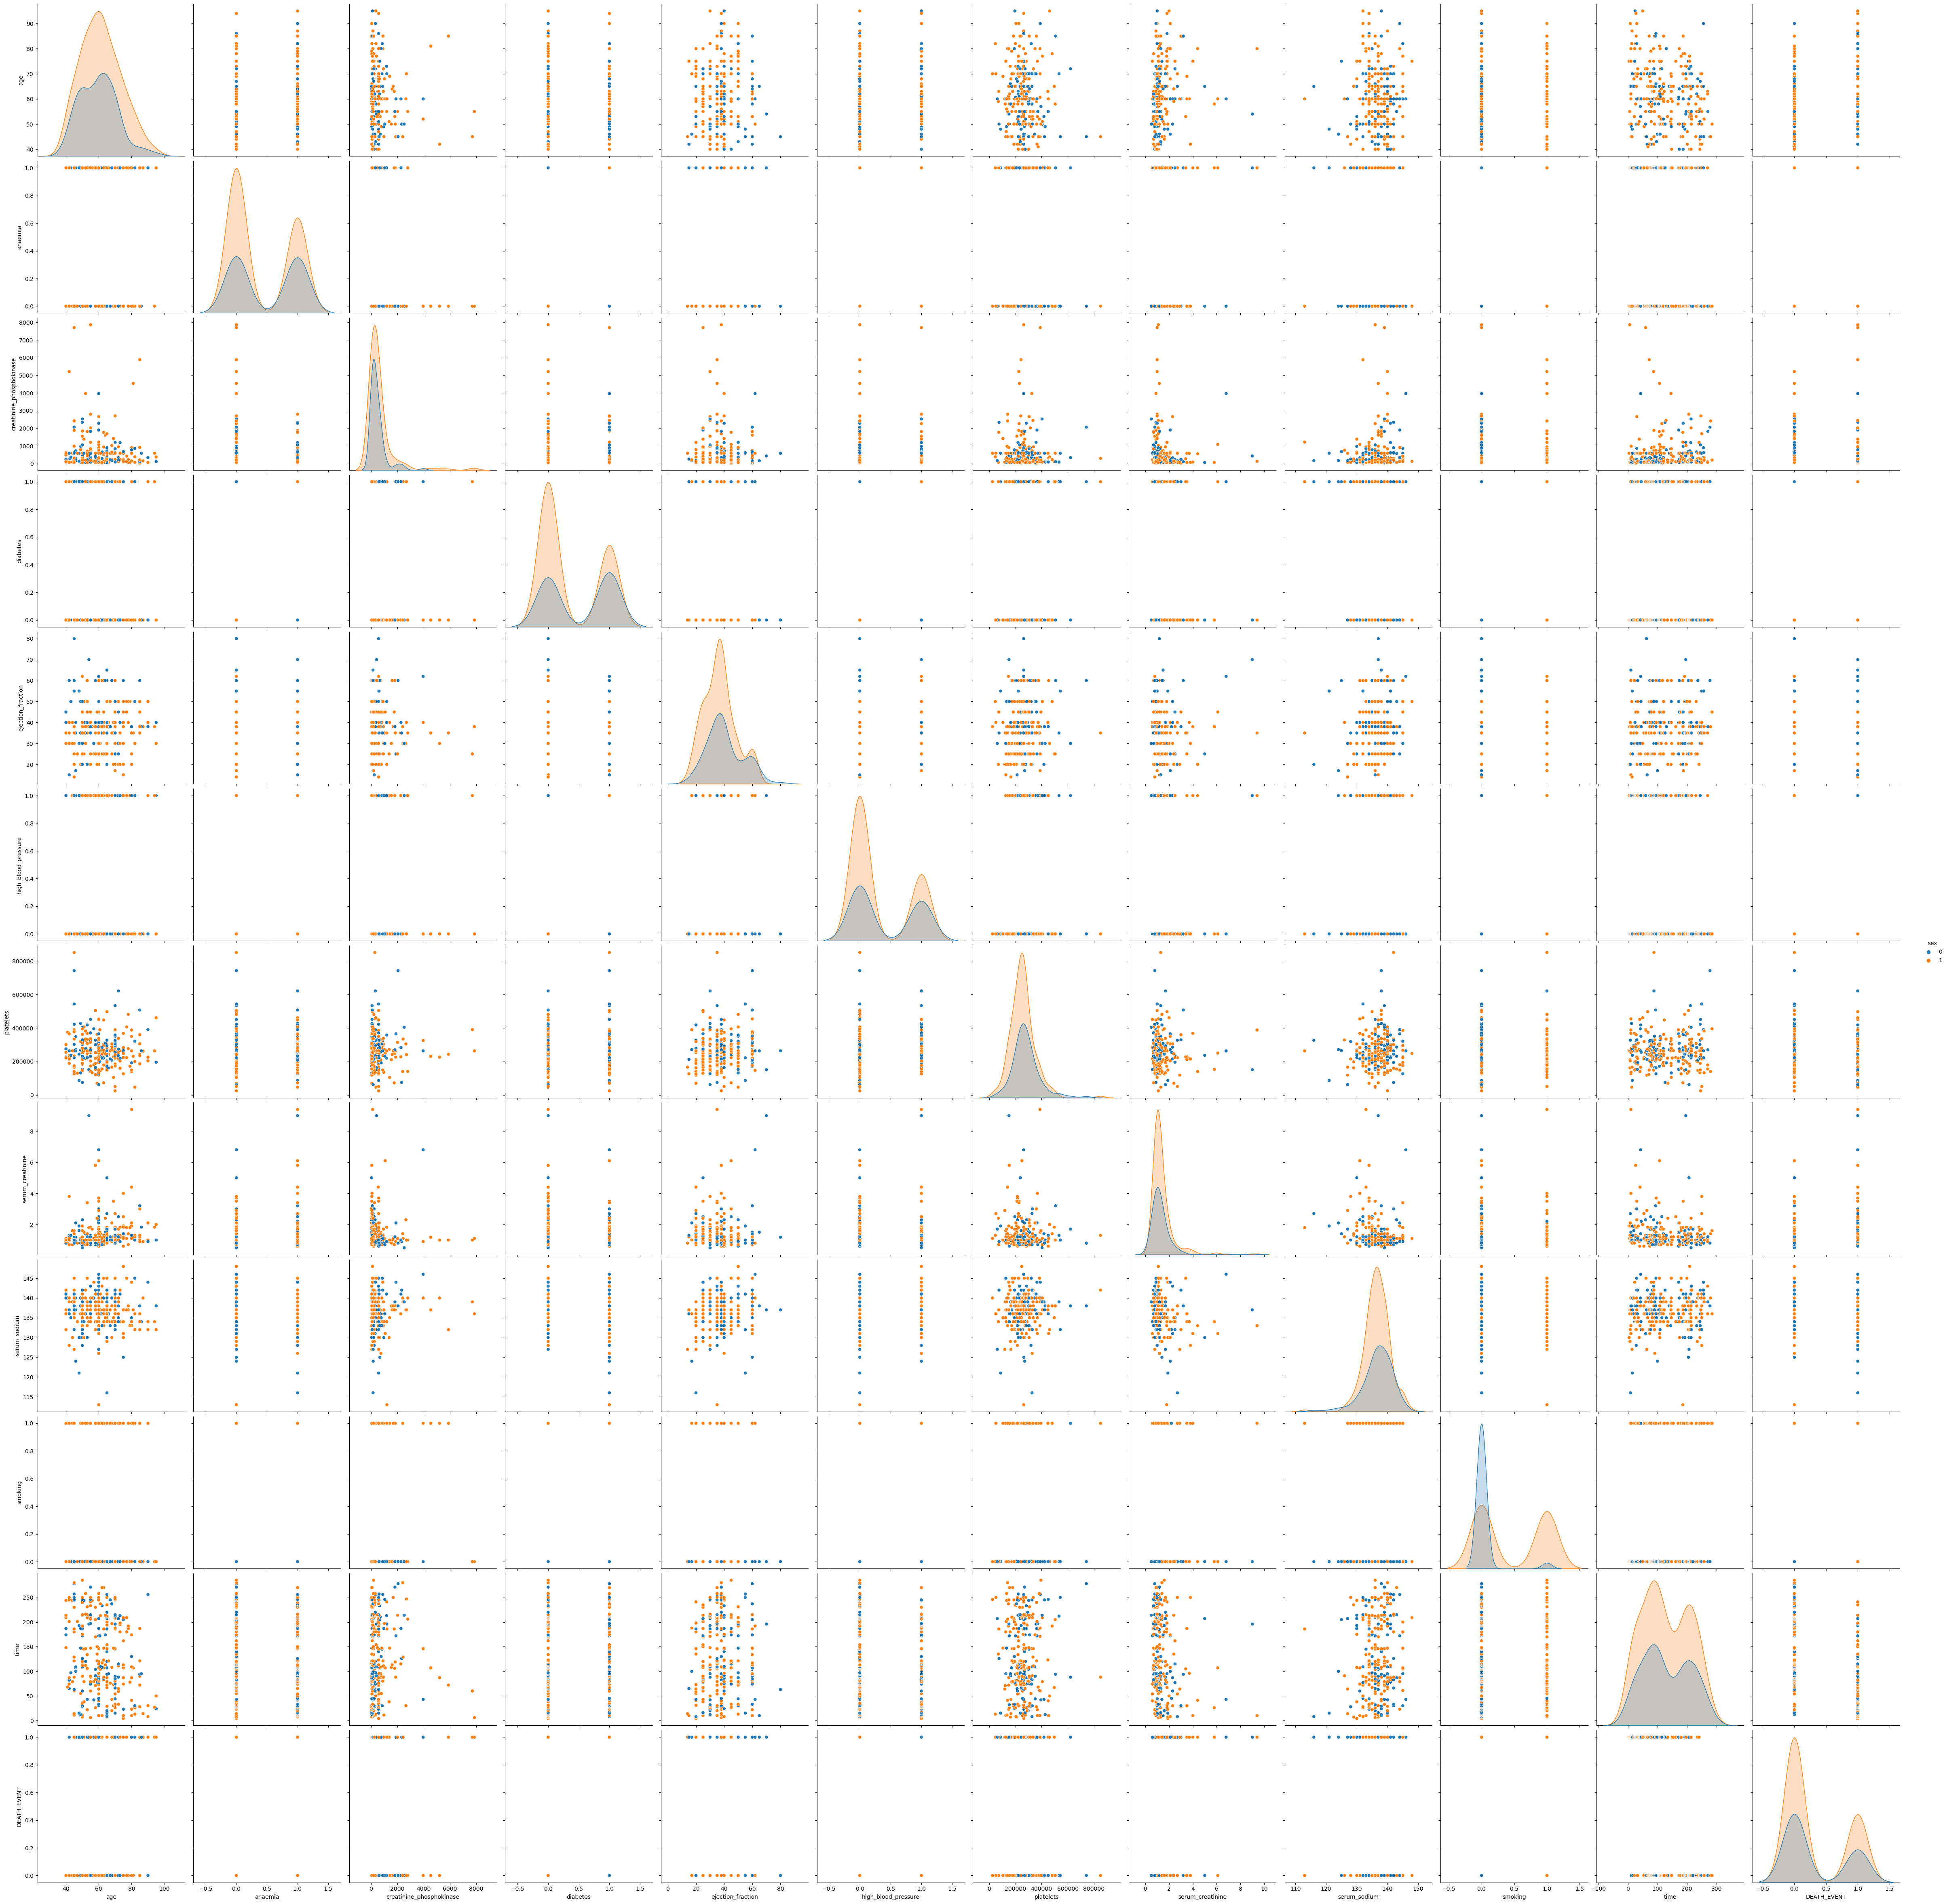

In [24]:
sns.pairplot(df, hue="sex",height=4)
plt.show()

In [25]:
train_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
train_data=df[train_col]
label_data=df["DEATH_EVENT"]

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.3,random_state=42)

# Create XGB Model

In [27]:
model=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,early_stopping_rounds=50)
model.fit(X_train, Y_train, eval_set=[(X_test,Y_test)],verbose=10)


[0]	validation_0-logloss:0.65890
[10]	validation_0-logloss:0.51436
[20]	validation_0-logloss:0.49867
[30]	validation_0-logloss:0.50383
[40]	validation_0-logloss:0.50043
[50]	validation_0-logloss:0.50245
[60]	validation_0-logloss:0.50357
[70]	validation_0-logloss:0.51298
[74]	validation_0-logloss:0.51583


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
pred=model.predict(X_test)
ac_score=accuracy_score(Y_test,pred)
print("Accuracy Score :",ac_score)

Accuracy Score : 0.7666666666666667


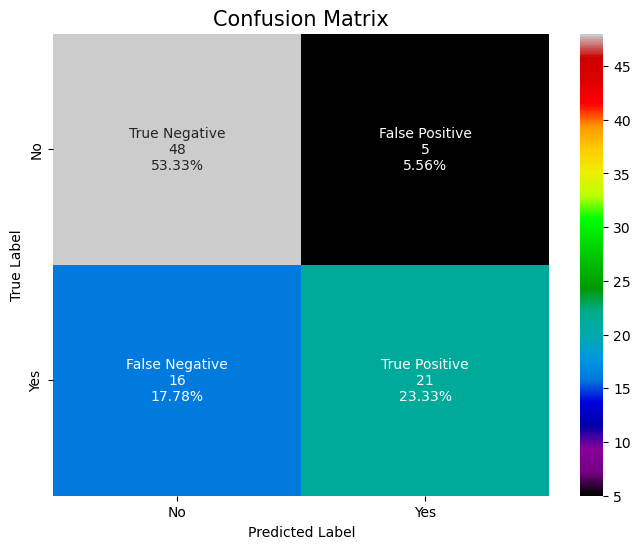

In [29]:
label_name=["No","Yes"]
my_matrix= confusion_matrix(Y_test, pred)
my_label = ["True Negative","False Positive","False Negative","True Positive"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, annot=labels, cmap="nipy_spectral", fmt="", cbar=True,
            xticklabels=label_name,yticklabels=label_name)
plt.xlabel("Predicted Label",fontsize=10,color="black")
plt.ylabel("True Label",fontsize=10,color="black")
plt.title("Confusion Matrix",fontsize=15,color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.show()

In [30]:
print(classification_report(Y_test,pred,target_names=label_name))

              precision    recall  f1-score   support

          No       0.75      0.91      0.82        53
         Yes       0.81      0.57      0.67        37

    accuracy                           0.77        90
   macro avg       0.78      0.74      0.74        90
weighted avg       0.77      0.77      0.76        90



In [31]:
print("Precision Score :",precision_score(Y_test,pred))

Precision Score : 0.8076923076923077


In [32]:
print("Recall Score :",recall_score(Y_test,pred))

Recall Score : 0.5675675675675675


In [33]:
print("F1 Score :",f1_score(Y_test,pred))

F1 Score : 0.6666666666666666


In [34]:
print("Roc Auc Score :",roc_auc_score(Y_test,pred))

Roc Auc Score : 0.7366139724630291


# ROC Curve

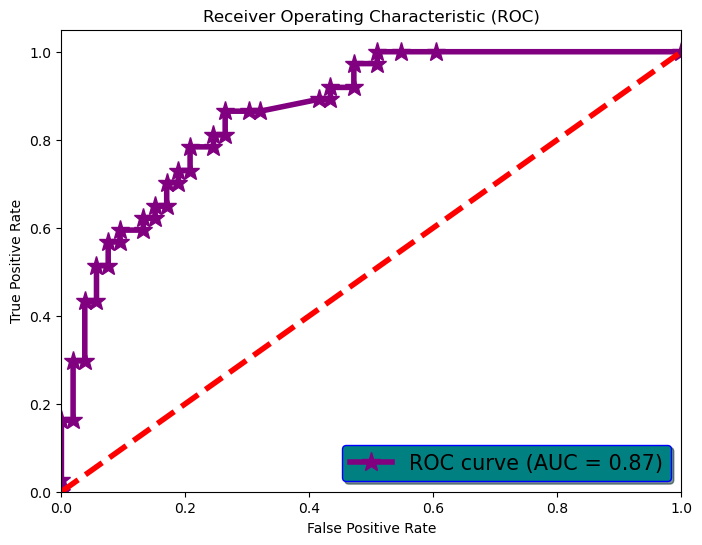

In [35]:
y_pred = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc,color="purple",lw=4,marker="*",markersize=14)
plt.plot([0, 1], [0, 1],lw=4,color="red",linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right",facecolor="teal",fontsize=15,shadow=True,edgecolor="blue")
plt.show()
